In [ ]:
# making visualtions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('output.csv')


if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])


print(df.head())


        subreddit                                    title  \
0  wallstreetbets  how are we playing tesla fellow regards   
1  wallstreetbets                            tesla optimus   
2  wallstreetbets          taking out a loan to trade with   
3  wallstreetbets                             all in tesla   
4  wallstreetbets              hs how the gpu bubble burst   

                                            selftext  upvote_ratio  ups  \
0  calls puts personally i couldnt give a shit ab...          1.00    3   
1                                                NaN          1.00    4   
2  i know i know but hear me out my business got ...          0.67    3   
3                                                NaN          0.76   18   
4  do we yet have an answer to the bn question it...          1.00    8   

   downs                                                url  sentiment_score  \
0      0  https://www.reddit.com/r/wallstreetbets/commen...           0.6870   
1      0        

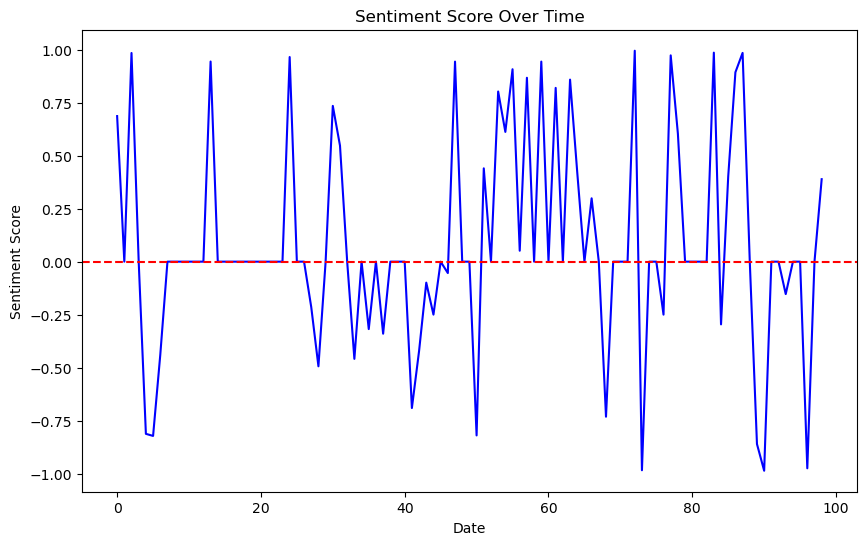

In [2]:

if 'date' in df.columns:
    df.set_index('date', inplace=True)


plt.figure(figsize=(10, 6))
df['sentiment_score'].plot(title='Sentiment Score Over Time', color='blue')
plt.axhline(0, color='red', linestyle='--') 
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.show()


In [5]:

def recommendation(row):
    if row['sentiment_score'] > 0.5:
        return 'Buy'
    elif row['sentiment_score'] < -0.5:
        return 'Sell'
    else:
        return 'Hold'


df['recommendation'] = df.apply(recommendation, axis=1)


print(df[['sentiment_score', 'recommendation']].head())


   sentiment_score recommendation
0           0.6870            Buy
1           0.0000           Hold
2           0.9848            Buy
3           0.0000           Hold
4          -0.8126           Sell


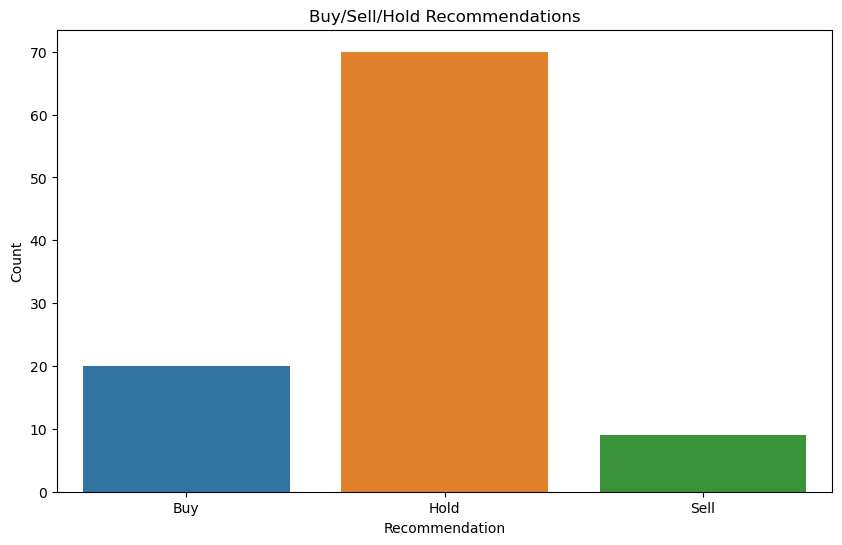

In [6]:

plt.figure(figsize=(10, 6))
sns.countplot(x='recommendation', data=df)
plt.title('Buy/Sell/Hold Recommendations')
plt.xlabel('Recommendation')
plt.ylabel('Count')
plt.show()


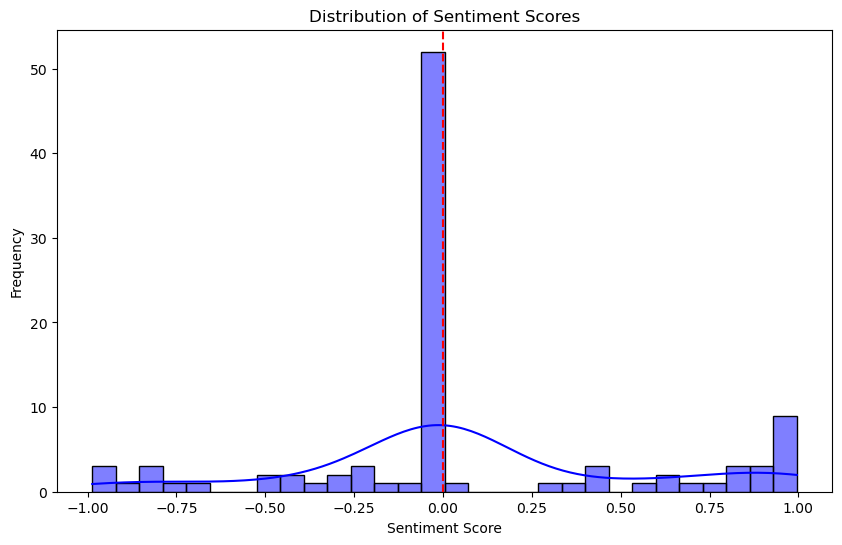

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_score'], bins=30, kde=True, color='blue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--') 
plt.show()


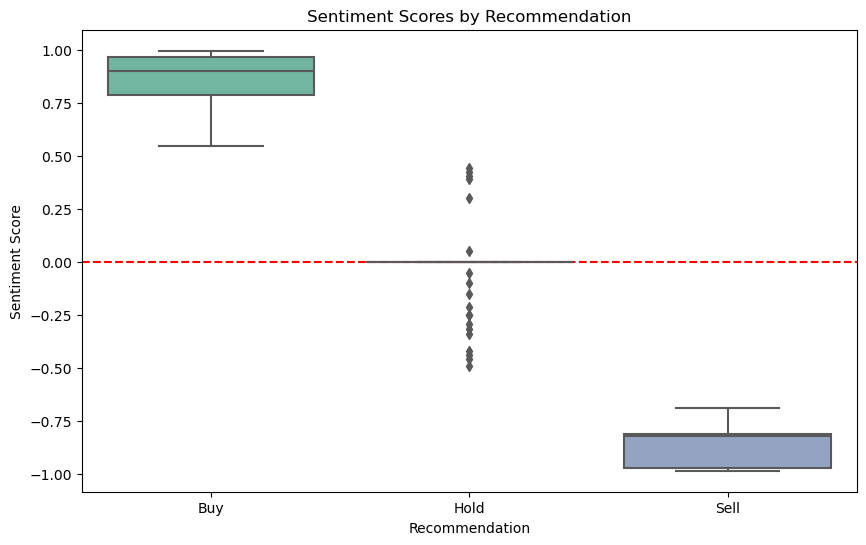

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='recommendation', y='sentiment_score', data=df, palette='Set2')
plt.title('Sentiment Scores by Recommendation')
plt.xlabel('Recommendation')
plt.ylabel('Sentiment Score')
plt.axhline(0, color='red', linestyle='--')
plt.show()


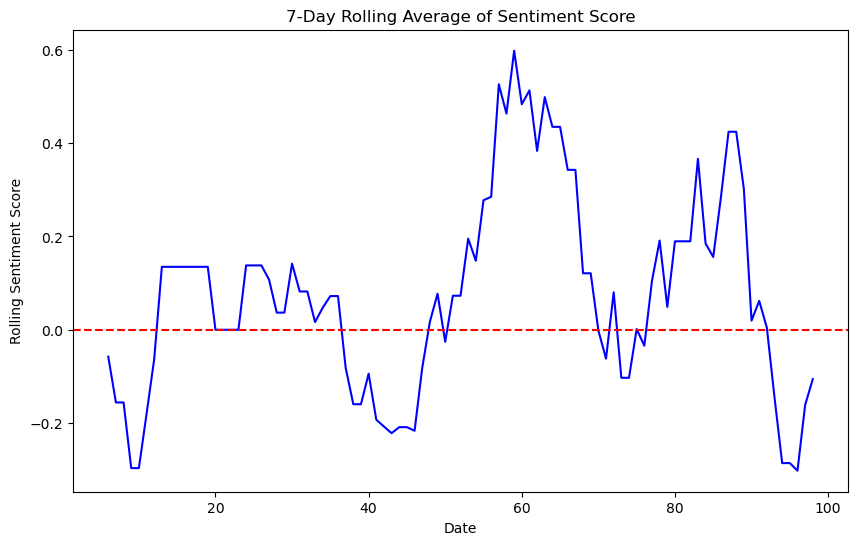

In [9]:
# Calculate rolling average of sentiment score
df['rolling_sentiment'] = df['sentiment_score'].rolling(window=7).mean()  # 7-day rolling average

plt.figure(figsize=(10, 6))
df['rolling_sentiment'].plot(title='7-Day Rolling Average of Sentiment Score', color='blue')
plt.axhline(0, color='red', linestyle='--')  # Neutral sentiment line
plt.xlabel('Date')
plt.ylabel('Rolling Sentiment Score')
plt.show()


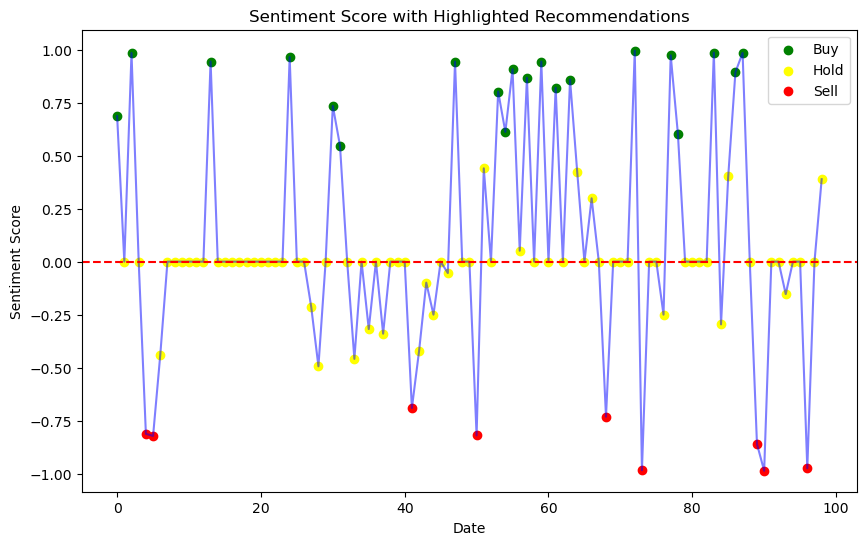

In [11]:
plt.figure(figsize=(10, 6))
colors = {'Buy': 'green', 'Sell': 'red', 'Hold': 'yellow'}

for recommendation in df['recommendation'].unique():
    subset = df[df['recommendation'] == recommendation]
    plt.scatter(subset.index, subset['sentiment_score'], color=colors[recommendation], label=recommendation)

plt.plot(df.index, df['sentiment_score'], color='blue', alpha=0.5)  
plt.axhline(0, color='red', linestyle='--')  
plt.title('Sentiment Score with Highlighted Recommendations')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()


In [12]:
# checking all info for compiling report

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import FileLink
import os


df = pd.read_csv('output.csv')


if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])


if 'date' in df.columns:
    df.set_index('date', inplace=True)
    
def recommendation(row):
    if row['sentiment_score'] > 0.5:
        return 'Buy'
    elif row['sentiment_score'] < -0.5:
        return 'Sell'
    else:
        return 'Hold'

df['recommendation'] = df.apply(recommendation, axis=1)


print(df[['sentiment_score', 'recommendation']].head())  




# Sentiment Score Over Time
plt.figure(figsize=(10, 6))
df['sentiment_score'].plot(title='Sentiment Score Over Time', color='blue')
plt.axhline(0, color='red', linestyle='--') 
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.savefig('sentiment_score_over_time.png')  
plt.close()

# Buy/Sell/Hold Recommendations
plt.figure(figsize=(10, 6))
sns.countplot(x='recommendation', data=df)
plt.title('Buy/Sell/Hold Recommendations')
plt.xlabel('Recommendation')
plt.ylabel('Count')
plt.savefig('buy_sell_hold_recommendations.png')  
plt.close()

# Distribution of Sentiment Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_score'], bins=30, kde=True, color='blue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--') 
plt.savefig('distribution_of_sentiment_scores.png')  
plt.close()

# Sentiment Scores by Recommendation
plt.figure(figsize=(10, 6))
sns.boxplot(x='recommendation', y='sentiment_score', data=df, palette='Set2')
plt.title('Sentiment Scores by Recommendation')
plt.xlabel('Recommendation')
plt.ylabel('Sentiment Score')
plt.axhline(0, color='red', linestyle='--')
plt.savefig('sentiment_scores_by_recommendation.png')  
plt.close()

# 7-Day Rolling Average of Sentiment Score
df['rolling_sentiment'] = df['sentiment_score'].rolling(window=7).mean()  
plt.figure(figsize=(10, 6))
df['rolling_sentiment'].plot(title='7-Day Rolling Average of Sentiment Score', color='blue')
plt.axhline(0, color='red', linestyle='--')  
plt.xlabel('Date')
plt.ylabel('Rolling Sentiment Score')
plt.savefig('rolling_sentiment_average.png')  
plt.close()

# Sentiment Score with Highlighted Recommendations
plt.figure(figsize=(10, 6))
colors = {'Buy': 'green', 'Sell': 'red', 'Hold': 'yellow'}
for recommendation in df['recommendation'].unique():
    subset = df[df['recommendation'] == recommendation]
    plt.scatter(subset.index, subset['sentiment_score'], color=colors[recommendation], label=recommendation)
plt.plot(df.index, df['sentiment_score'], color='blue', alpha=0.5)  
plt.axhline(0, color='red', linestyle='--')  
plt.title('Sentiment Score with Highlighted Recommendations')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.savefig('sentiment_score_with_recommendations.png')  
plt.close()


images = [
    'sentiment_score_over_time.png',
    'buy_sell_hold_recommendations.png',
    'distribution_of_sentiment_scores.png',
    'sentiment_scores_by_recommendation.png',
    'rolling_sentiment_average.png',
    'sentiment_score_with_recommendations.png'
]

for img in images:
    if os.path.exists(img):
        print(f"{img} exists.")
    else:
        print(f"Warning: {img} does not exist.")



   sentiment_score recommendation
0           0.6870            Buy
1           0.0000           Hold
2           0.9848            Buy
3           0.0000           Hold
4          -0.8126           Sell
sentiment_score_over_time.png exists.
buy_sell_hold_recommendations.png exists.
distribution_of_sentiment_scores.png exists.
sentiment_scores_by_recommendation.png exists.
rolling_sentiment_average.png exists.
sentiment_score_with_recommendations.png exists.


In [32]:
#compiling the report

In [33]:

def generate_report(df):
    report = []

    # Title
    report.append("=== Sentiment Analysis Report ===\n\n")

    # Average and Median Sentiment
    avg_sentiment = df['sentiment_score'].mean()
    median_sentiment = df['sentiment_score'].median()

    report.append(f"Average Sentiment Score: {avg_sentiment:.2f}\n")
    report.append(f"Median Sentiment Score: {median_sentiment:.2f}\n")
    
    # Visualizations
    report.append("=== Visualizations ===\n\n")

    report.append("1. **Sentiment Score Over Time**\n")
    report.append("This graph shows the sentiment score over time. A positive score indicates a generally optimistic sentiment, "
                  "while a negative score indicates pessimism. The red dashed line represents a neutral sentiment.\n")
    report.append("![Sentiment Score Over Time](sentiment_score_over_time.png)\n\n")

    report.append("2. **Buy/Sell/Hold Recommendations**\n")
    report.append("This graph shows the distribution of trading signals based on sentiment scores.\n")
    report.append("![Buy/Sell/Hold Recommendations](buy_sell_hold_recommendations.png)\n\n")

    report.append("3. **Distribution of Sentiment Scores**\n")
    report.append("This histogram displays the distribution of sentiment scores across all analyzed discussions. "
                  "The density plot (KDE) helps visualize the concentration of scores, with a neutral sentiment line shown in red.\n")
    report.append("![Distribution of Sentiment Scores](distribution_of_sentiment_scores.png)\n\n")

    report.append("4. **Sentiment Scores by Recommendation**\n")
    report.append("The box plot shows the distribution of sentiment scores for each recommendation (Buy, Sell, Hold). "
                  "This helps visualize how sentiment varies with different trading signals.\n")
    report.append("![Sentiment Scores by Recommendation](sentiment_scores_by_recommendation.png)\n\n")

    report.append("5. **7-Day Rolling Average of Sentiment Score**\n")
    report.append("This graph shows the 7-day rolling average of sentiment scores, helping to smooth out fluctuations.\n")
    report.append("![7-Day Rolling Average](rolling_sentiment_average.png)\n\n")

    report.append("6. **Sentiment Score with Highlighted Recommendations**\n")
    report.append("This graph shows sentiment scores with highlighted trading recommendations, allowing us to see how sentiment "
                  "correlates with Buy/Sell/Hold signals.\n")
    report.append("![Sentiment Score with Recommendations](sentiment_score_with_recommendations.png)\n\n")

    report.append("=== Conclusion ===\n")
    report.append("The analysis indicates that the sentiment scores provide valuable insights into potential trading signals. "
                  "Positive sentiment tends to correlate with buy signals, while negative sentiment correlates with sell signals.\n")
    
    # Saving the report
    with open('sentiment_analysis_report.md', 'w') as file:
        file.write(''.join(report))

    print("Report generated and saved as 'sentiment_analysis_report.md'.")




In [34]:
#Generating and Downloading the Report

In [35]:
# Generate the report
generate_report(df)

# Provide a download link for the report
report_filename = 'sentiment_analysis_report.md'
report_link = FileLink(report_filename)
report_link

Report generated and saved as 'sentiment_analysis_report.md'.


/Users/avssp/Desktop/sentiment_analysis_report.md